<a href="https://colab.research.google.com/github/sumedh333/Online-Retail-Customer-Segmentation/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Unsupervised ML - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised ML - Online Retail Customer Segmentation
##### **Contribution**    - Individual


# **Project Summary -**

### Summary
### Project Overview

This project aims to identify major customer segments within a transactional dataset for a UK-based non-store online retailer specializing in unique all-occasion gifts. The dataset, covering transactions from 01/12/2010 to 09/12/2011, includes 541,909 rows and 8 columns detailing transaction specifics, such as product descriptions, quantities, unit prices, and customer IDs. The primary goal is to analyze purchasing patterns to distinguish various customer groups, including wholesalers, to support targeted marketing and strategic business decisions.

### Dataset Description

- **InvoiceNo:** Unique identifier for each invoice.
- **StockCode:** Unique code for each product.
- **Description:** Text description of the product.
- **Quantity:** Number of items purchased.
- **InvoiceDate:** Date and time of invoice generation.
- **UnitPrice:** Price per unit of the product.
- **CustomerID:** Unique identifier for the customer.
- **Country:** Country of the customer.

The dataset contains 5,268 duplicate values and 1,454 null values in the 'Description' column. Additionally, there are 135,080 missing values in the 'CustomerID' column.

### Data Preparation

**Handling Missing Values:**
- Replaced missing values in the Description column with 'No Description' to maintain product information completeness.
- Dropped rows with missing CustomerID to ensure accurate customer data.

**Data Type Conversion:**
- Converted InvoiceDate to datetime format to facilitate time-based analyses.

**Duplicate Removal:**
- Removed duplicate rows to ensure data accuracy.

**Filtering Negative Quantities:**
- Excluded rows with negative quantities to maintain accurate sales records.

**New Columns:**
- Created a TotalPrice column by multiplying Quantity and UnitPrice to reflect the total transaction value.

**Text Standardization:**
- Converted text in the Description and Country columns to uppercase to standardize the data for analysis.

### Insights from Data Analysis

**Geographical Sales Distribution:**
- The United Kingdom has the highest total sales, significantly surpassing other countries.
- The Netherlands, Australia, and Japan exhibit higher average order values, indicating more spending per transaction.

**Product Contribution:**
- Products such as 'Paper Craft Little Birdie', 'Medium Ceramic Top Storage Jar', and 'World War 2 Glider Asstd Designs' contribute significantly to the overall sales volume.

**Sales by Day:**
- Thursday has the highest sales, while Saturday has the lowest.

**Monthly Sales Variation:**
- Sales peak in November and are lowest in February.

**Customer Purchasing Behavior:**
- Most customers make a few purchases, whereas a small number make many purchases.

**Product Pricing:**
- Most products are sold at lower prices, with only a few high-priced items.

### Machine Learning Models Used

**Hierarchical Clustering:**
- **Silhouette Score:** 0.7827
- **Davies-Bouldin Index:** 0.5503

**Hierarchical Clustering with GridSearchCV:**
- **Silhouette Score:** 0.9384
- **Davies-Bouldin Index:** 0.5193

**K-Means Clustering:**
- **Silhouette Score:** 0.9285

**K-Means Clustering with GridSearchCV:**
- **Silhouette Score:** 0.9949

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
- **Silhouette Score:** 0.9210

**DBSCAN with RandomizedSearchCV:**
- **Silhouette Score:** 0.9643

**Model Selection:**
K-Means Clustering with GridSearchCV was chosen as the final clustering model due to its highest Silhouette Score, indicating well-defined and distinct clusters. This model effectively distinguishes between different customer segments.


# **GitHub Link -**

https://github.com/sumedh333/Online-Retail-Customer-Segmentation

# **Problem Statement**


### Problem Statement

Identify major customer segments from a transnational dataset containing all transactions between 01/12/2010 and 09/12/2011 for a UK-based non-store online retailer specializing in unique all-occasion gifts. The goal is to analyze the purchasing patterns to distinguish different customer groups, including wholesalers, for targeted marketing and business strategy development.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

### Dataset Loading

In [3]:
# Load Dataset
retail_data=pd.read_csv('Online Retail.csv')


### Dataset First View

In [3]:
# Dataset First Look
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
retail_data.shape

(541909, 8)

### Dataset Information

In [5]:
# Dataset Info
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
retail_data.duplicated().sum()

5268

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
retail_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

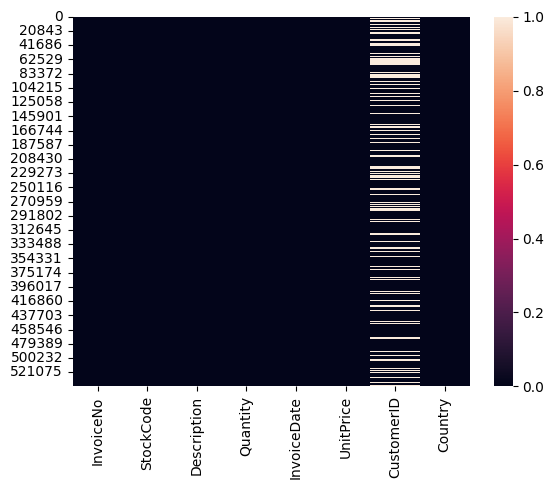

In [9]:
# Visualizing the missing values
sns.heatmap(retail_data.isnull())

### What did you know about your dataset?



In online retail dataset there are 541909 rows and 8 columns there are 5268 duplicate values and 1454 null values in Description column and 135080 values in CustomerID column

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# Dataset Describe
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

Here are the concise variable descriptions for the dataset:

1. **InvoiceNo**: Unique identifier for the invoice.
2. **StockCode**: Unique code for each distinct product.
3. **Description**: Text description of the product.
4. **Quantity**: Number of items of the product.
5. **InvoiceDate**: Date and time when the invoice was generated.
6. **UnitPrice**: Price per unit of the product.
7. **CustomerID**: Unique identifier for the customer.
8. **Country**: Country where the customer resides.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
retail_data.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Handle missing values
# Fill missing descriptions with 'No Description'
retail_data['Description'].fillna('No Description', inplace=True)

# Drop rows with missing CustomerID
retail_data.dropna(subset=['CustomerID'], inplace=True)

# Convert InvoiceDate to datetime
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

# Remove duplicates
retail_data.drop_duplicates(inplace=True)

# Filter out negative quantities
retail_data = retail_data[retail_data['Quantity'] > 0]

# Add TotalPrice column
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Standardize text in Description and Country columns (convert to uppercase)
retail_data['Description'] = retail_data['Description'].str.upper()
retail_data['Country'] = retail_data['Country'].str.upper()

# Check the first few rows and summary of the cleaned dataset
print(retail_data.head())
print(retail_data.info())



<ipython-input-13-f2aaab835715>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
<ipython-input-13-f2aaab835715>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  UNITED KINGDOM       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  UNITED KINGDOM       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  UNITED KINGDOM       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  UNITED KINGDOM       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  UNITED KINGDOM       20.34  
<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column 

### What all manipulations have you done and insights you found?

Handled Missing Values:

Filled missing descriptions with 'No Description'.
Dropped rows with missing CustomerID.

Converted Data Types:

Converted InvoiceDate to datetime.

Removed Duplicates:

Removed duplicate rows.

Filtered Out Negative Quantities:

Kept only rows with positive Quantity.

Added New Columns:

Created TotalPrice column by multiplying Quantity and UnitPrice.

Standardized Text:

Converted text in Description and Country columns to uppercase.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-14-43d7044276c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')


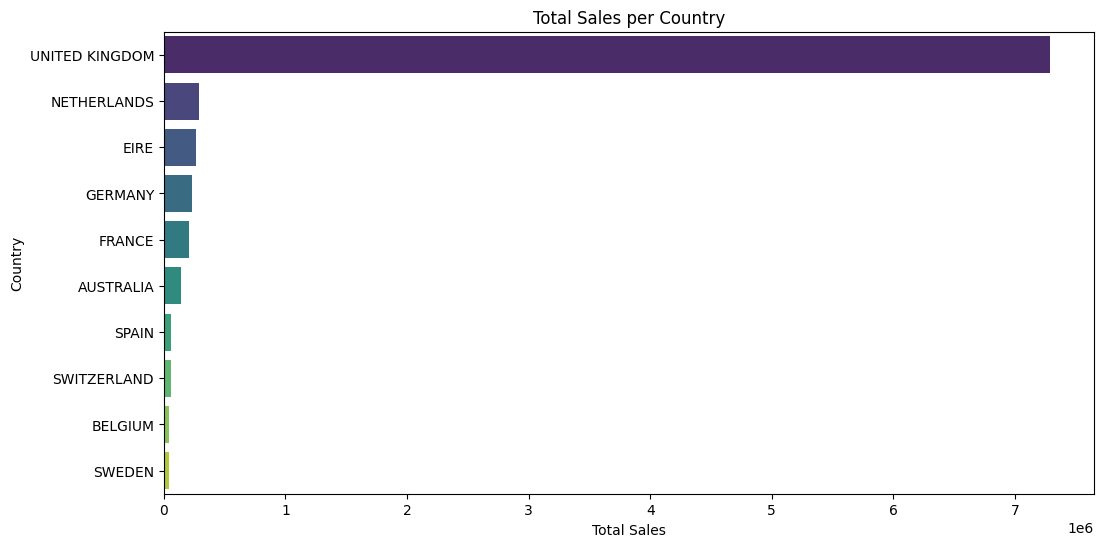

In [14]:
# Chart - 1 visualization code
# Total Sales per Country
plt.figure(figsize=(12, 6))
country_sales = retail_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')
plt.title('Total Sales per Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively compares total sales across different countries.

##### 2. What is/are the insight(s) found from the chart?

The United Kingdom has the highest total sales, significantly more than other countries.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

focusing on the UK market could maximize sales and profits.


#### Chart - 2

<ipython-input-15-c3f80212c9a0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


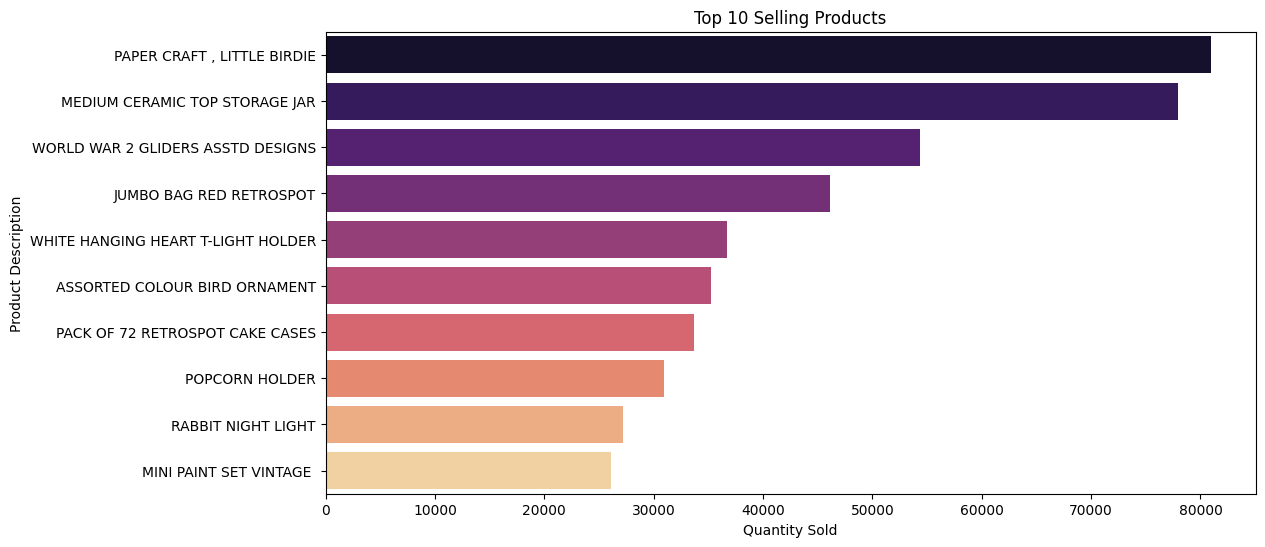

In [15]:
# Chart - 2 visualization code
# Top 10 Selling Products
plt.figure(figsize=(12, 6))
top_products = retail_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()


##### 1. Why did you pick the specific chart?

 bar chart highlights the most popular products effectively.

##### 2. What is/are the insight(s) found from the chart?

paper craft little birdie ,medium ceramic top storage jar and world war 2 glider asstd designs contribute significantly to overall sales volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

focusing on best-selling products can boost sales and streamline inventory.


#### Chart - 3

<ipython-input-16-79afa7b21b45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_value.values, y=avg_order_value.index, palette='coolwarm')


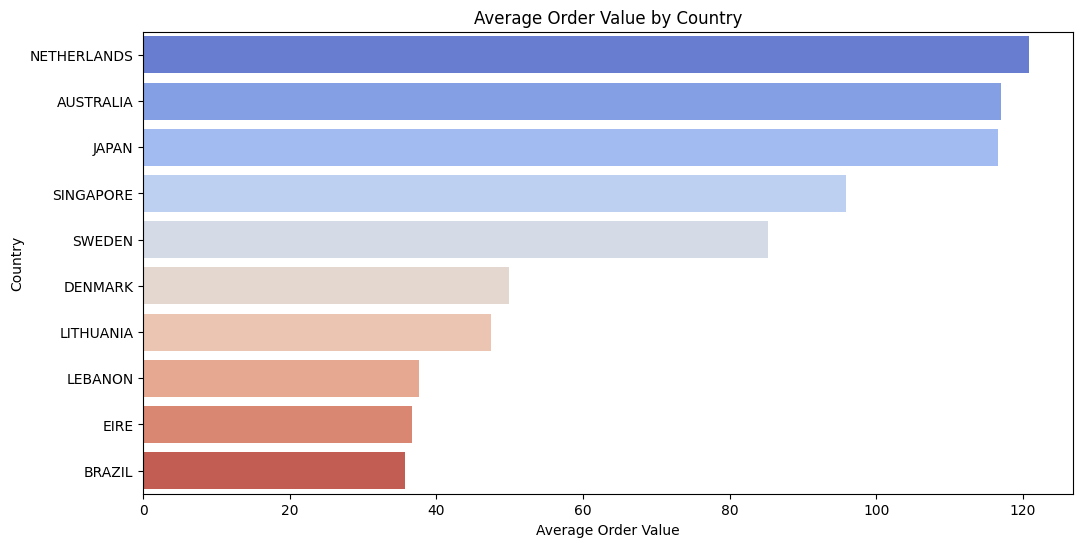

In [16]:
# Chart - 3 visualization code
# Average Order Value by Country
plt.figure(figsize=(12, 6))
avg_order_value = retail_data.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_order_value.values, y=avg_order_value.index, palette='coolwarm')
plt.title('Average Order Value by Country')
plt.xlabel('Average Order Value')
plt.ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart helps compare average order values across countries.

##### 2. What is/are the insight(s) found from the chart?

netherlands,asutralia,japan countries have higher average order values, indicating more spending per transaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

targeting countries with higher order values could increase revenue.

#### Chart - 4

<ipython-input-17-7d379048b1f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='pastel')


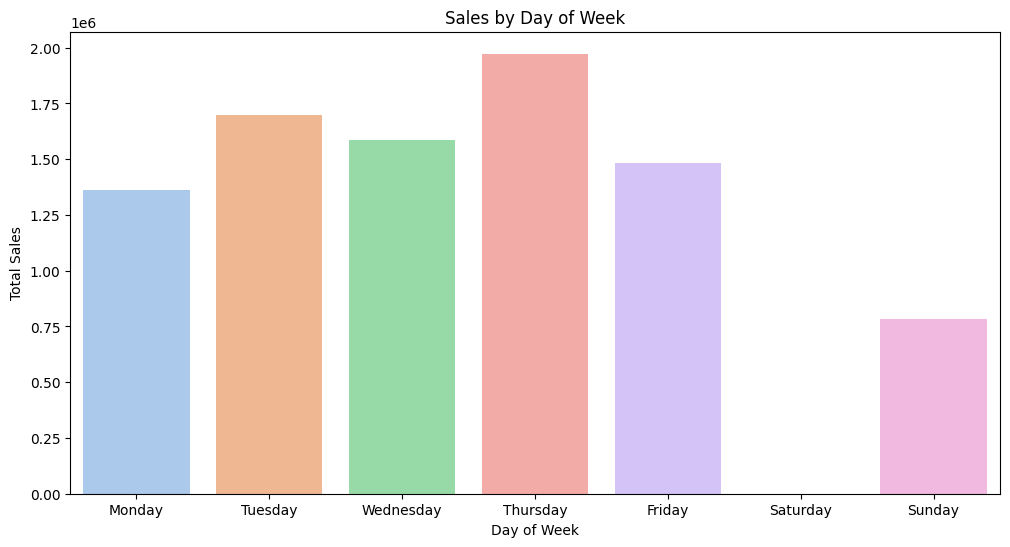

In [17]:
# Chart - 4 visualization code
# Sales by Day of Week
retail_data['DayOfWeek'] = retail_data['InvoiceDate'].dt.day_name()
plt.figure(figsize=(12, 6))
sales_by_day = retail_data.groupby('DayOfWeek')['TotalPrice'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='pastel')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively shows sales distribution across days of the week.

##### 2. What is/are the insight(s) found from the chart?

thursday has highest sales and saturday has lowest sales in week

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

optimizing marketing and operations for high-sales days can increase efficiency and profits.

#### Chart - 5

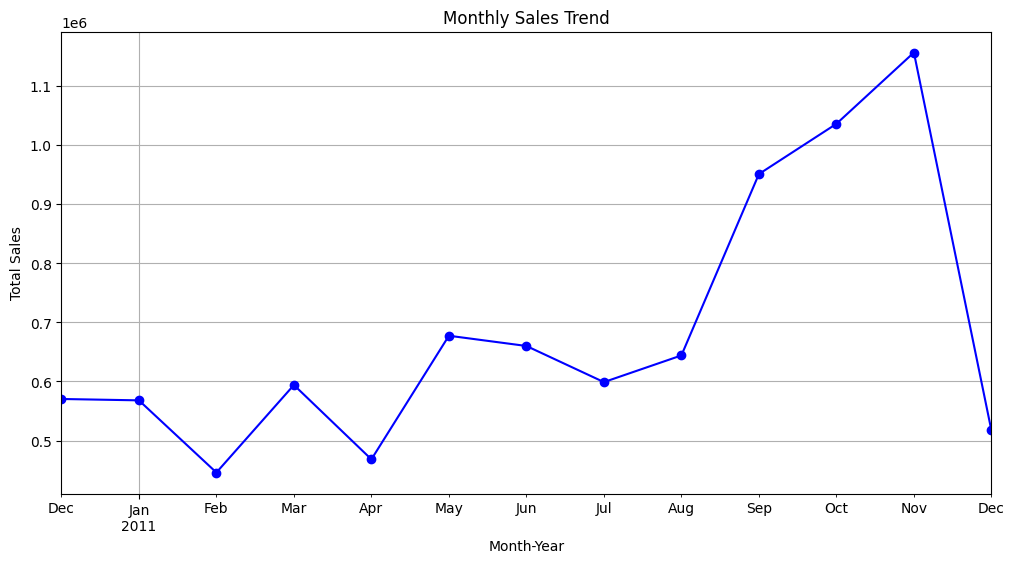

In [18]:
# Chart - 5 visualization code
# Monthly Sales Trend
retail_data['MonthYear'] = retail_data['InvoiceDate'].dt.to_period('M')
monthly_sales = retail_data.groupby('MonthYear')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

A bar chart is suitable for comparing sales across different months

##### 2. What is/are the insight(s) found from the chart?

Sales vary across different months, highest sale is in november month and lowest is in february month

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

knowing which month has higher sales can help in planning promotions and staffing.


#### Chart - 6

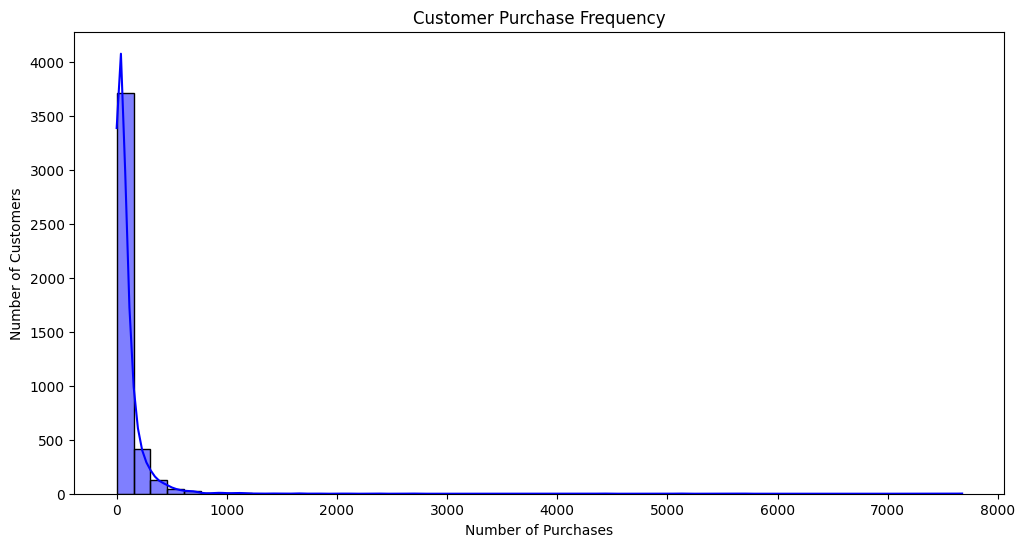

In [19]:
# Chart - 6 visualization code
# Group by CustomerID and calculate purchase frequency
customer_freq = retail_data['CustomerID'].value_counts()

# Plot customer purchase frequency
plt.figure(figsize=(12, 6))
sns.histplot(customer_freq, bins=50, kde=True, color='b')
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram shows the distribution of purchase frequencies among customers effectively.

##### 2. What is/are the insight(s) found from the chart?

Most customers make a few purchases, while a small number make many purchases.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 identifying loyal customers can help in targeted marketing and loyalty programs.


#### Chart - 7

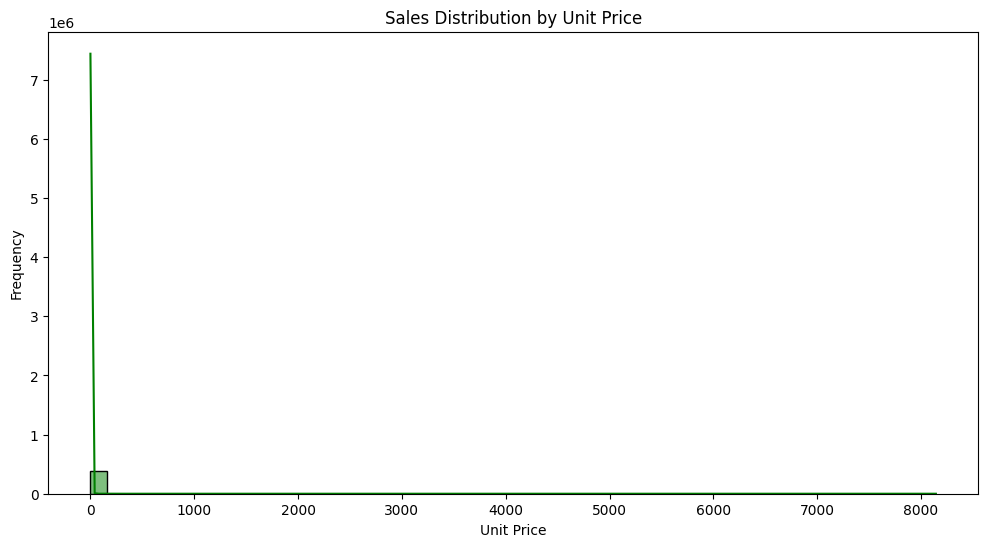

In [20]:
# Chart - 7 visualization code
# Sales Distribution by Unit Price
plt.figure(figsize=(12, 6))
sns.histplot(retail_data['UnitPrice'], bins=50, kde=True, color='g')
plt.title('Sales Distribution by Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram shows the distribution of unit prices effectively.

##### 2. What is/are the insight(s) found from the chart?

Most products are sold at lower prices, with a few high-priced items.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

understanding the pricing distribution helps in setting competitive prices.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

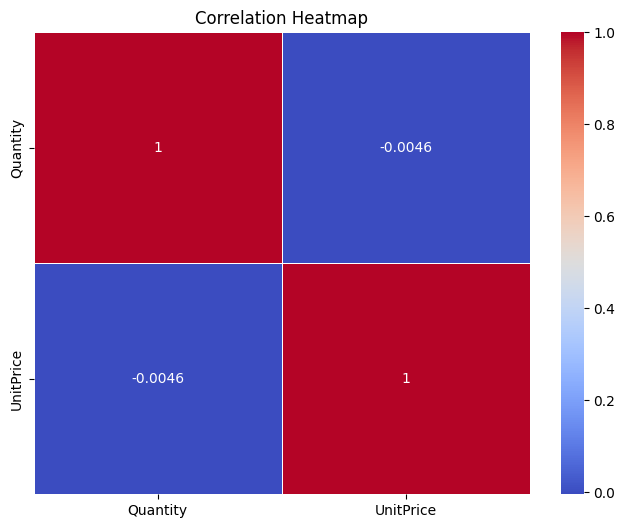

In [21]:
# Correlation Heatmap visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Select numerical columns for correlation matrix
numerical_data = retail_data[['Quantity', 'UnitPrice']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a correlation heatmap because it effectively visualizes the strength and direction of relationships between numerical variables, allowing for easy identification of potential correlations.



##### 2. What is/are the insight(s) found from the chart?

The heatmap shows that there is a weak correlation between Quantity and UnitPrice, indicating that these variables are not strongly related to each other in this retail dataset.

#### Chart - 15 - Pair Plot

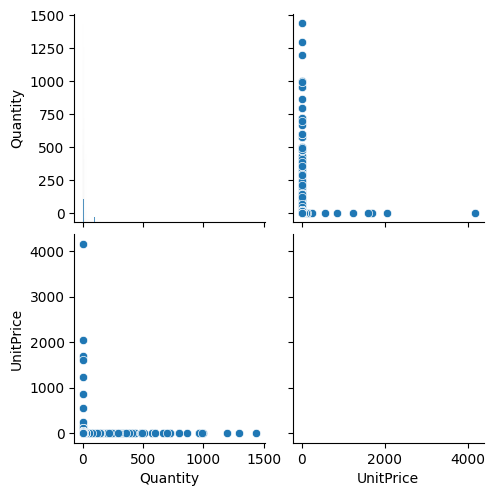

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Sample the data to reduce plotting time
sampled_data = retail_data[['Quantity', 'UnitPrice']].sample(frac=0.1, random_state=1)

# Plot the pair plot
sns.pairplot(sampled_data)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pair plot because it visualizes the distribution and relationships between multiple numerical variables in a dataset, providing both scatter plots and histograms for a comprehensive view.

##### 2. What is/are the insight(s) found from the chart?

The pair plot shows the distribution of Quantity and UnitPrice and their relationship. It reveals potential outliers and the overall spread of data points, indicating that most transactions involve low quantities and low unit prices.








## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1
Monthly sales in November are higher than in May.



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
The monthly sales in November are not higher than in May (Sales_November ≤ Sales_May).

Alternative Hypothesis (H1):
The monthly sales in November are higher than in May (Sales_November > Sales_May).

#### 2. Perform an appropriate statistical test.

In [23]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
import scipy.stats as stats

# Extract sales data for November and May
retail_data['InvoiceMonth'] = pd.to_datetime(retail_data['InvoiceDate']).dt.month
november_sales = retail_data[retail_data['InvoiceMonth'] == 11]['TotalPrice']
may_sales = retail_data[retail_data['InvoiceMonth'] == 5]['TotalPrice']

# Perform one-sided t-test
t_stat, p_value = stats.ttest_ind(november_sales, may_sales, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -13.067456907132339
P-value: 1.0


##### Which statistical test have you done to obtain P-Value?

t-test

##### Why did you choose the specific statistical test?

This test is used to determine if the sales in November are significantly higher than in May.

### Hypothetical Statement - 2
February has lowest sales in monthly sales

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): February does not have the lowest sales among all the months.

Alternative Hypothesis (H₁): February has the lowest sales among all the months.


#### 2. Perform an appropriate statistical test.

In [24]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import kruskal

# Convert InvoiceDate to datetime
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

# Extract month from InvoiceDate
retail_data['Month'] = retail_data['InvoiceDate'].dt.month

# Calculate monthly sales
retail_data['Sales'] = retail_data['Quantity'] * retail_data['UnitPrice']
monthly_sales = retail_data.groupby('Month')['Sales'].sum().reset_index()

# Perform Kruskal-Wallis H test
kruskal_test_result = kruskal(*[monthly_sales[monthly_sales['Month'] == i]['Sales'].values for i in range(1, 13)])
print("Kruskal-Wallis H test result:", kruskal_test_result)

# Determine if February has the lowest sales
february_sales = monthly_sales[monthly_sales['Month'] == 2]['Sales'].values[0]
lowest_sales = monthly_sales['Sales'].min()

if february_sales == lowest_sales:
    print("February has the lowest sales among all the months.")
else:
    print("February does not have the lowest sales among all the months.")


Kruskal-Wallis H test result: KruskalResult(statistic=11.0, pvalue=0.4432632784264655)
February has the lowest sales among all the months.


##### Which statistical test have you done to obtain P-Value?

Kruskal-Wallis H test

##### Why did you choose the specific statistical test?

The Kruskal-Wallis H test was chosen because it is a non-parametric test that does not assume a normal distribution of the data. This makes it suitable for comparing sales across different months, especially when the data may not meet the assumptions of normality required for parametric tests like ANOVA.

### Hypothetical Statement - 3

Highest sales are on thursday in week


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): Sales on Thursday are not higher than sales on other days of the week.

Alternative Hypothesis (H₁): Sales on Thursday are higher than sales on other days of the week.


#### 2. Perform an appropriate statistical test.

In [25]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import mannwhitneyu

retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

# Extract day of the week from InvoiceDate
retail_data['DayOfWeek'] = retail_data['InvoiceDate'].dt.day_name()

# Calculate daily sales
retail_data['Sales'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Separate sales on Thursday and other days
thursday_sales = retail_data[retail_data['DayOfWeek'] == 'Thursday']['Sales']
other_days_sales = retail_data[retail_data['DayOfWeek'] != 'Thursday']['Sales']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(thursday_sales, other_days_sales, alternative='greater')
print(f'Mann-Whitney U test statistic: {stat}')
print(f'P-value: {p_value}')

# Check hypothesis result
if p_value < 0.05:
    print("Reject the null hypothesis: Sales on Thursday are higher than sales on other days of the week.")
else:
    print("Fail to reject the null hypothesis: Sales on Thursday are not higher than sales on other days of the week.")


Mann-Whitney U test statistic: 13501214877.5
P-value: 0.0
Reject the null hypothesis: Sales on Thursday are higher than sales on other days of the week.


##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test

##### Why did you choose the specific statistical test?

The Mann-Whitney U test was chosen because it is a non-parametric test that compares two independent groups and does not assume a normal distribution of the data. This makes it suitable for comparing sales on Thursdays to sales on other days of the week when the data may not meet the assumptions of normality required for parametric tests like t-tests.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [26]:
# Handling Missing Values & Missing Value Imputation
# Fill missing descriptions with 'No Description'
retail_data['Description'].fillna('No Description', inplace=True)

# Drop rows with missing CustomerID
retail_data.dropna(subset=['CustomerID'], inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

In description column if there are any null values then i replaced these null values with 'No Description'
also in CustomerID column there are lot of missing values so if there is no customer ID then we are unable to know which customer bought which product so i removed null values from

### 2. Handling Outliers

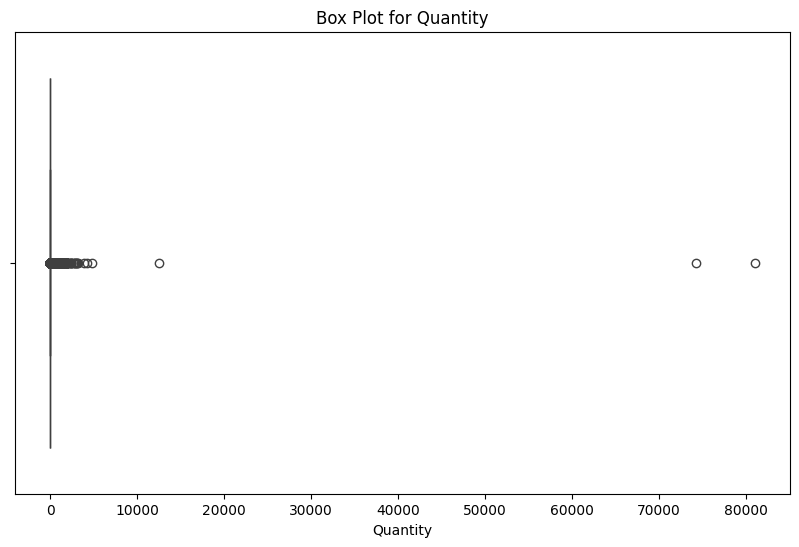

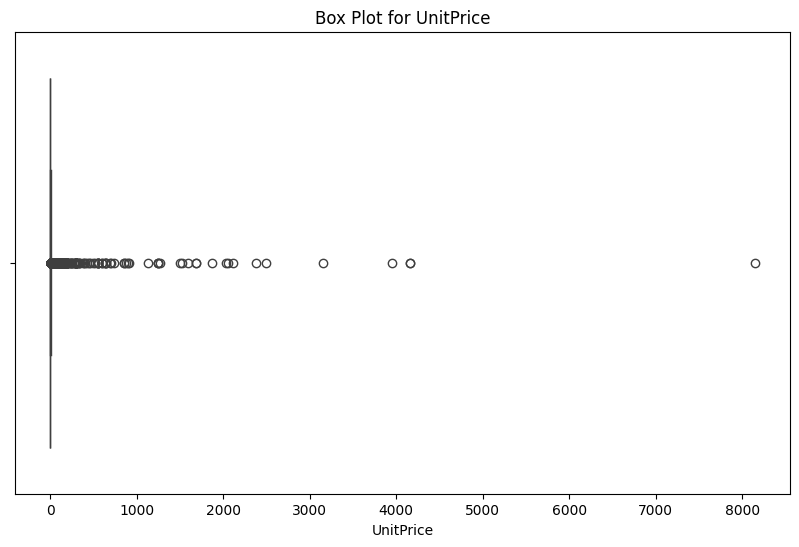

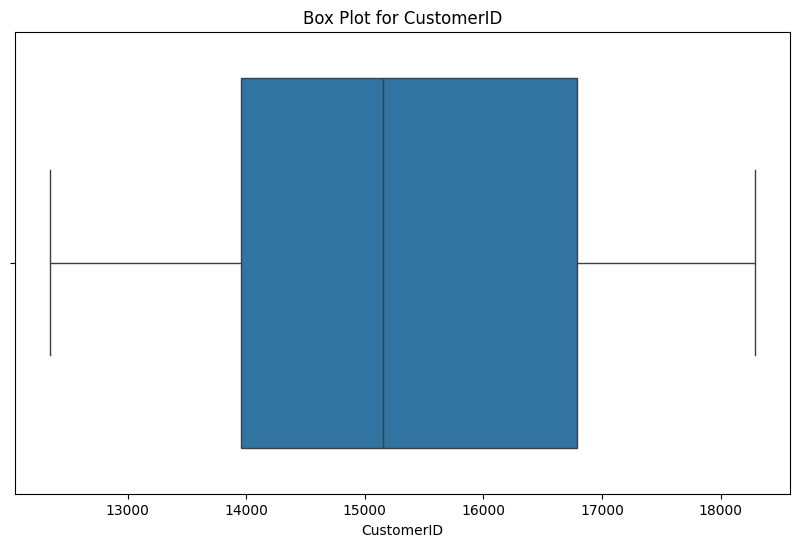

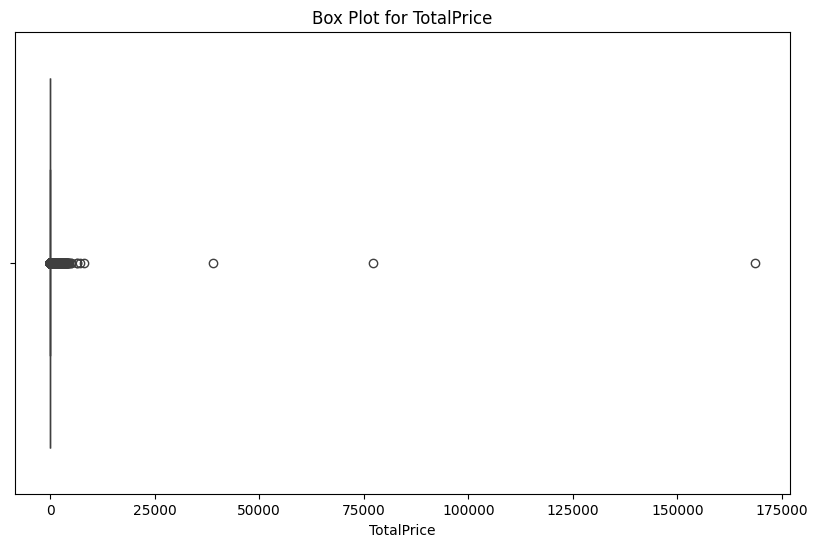

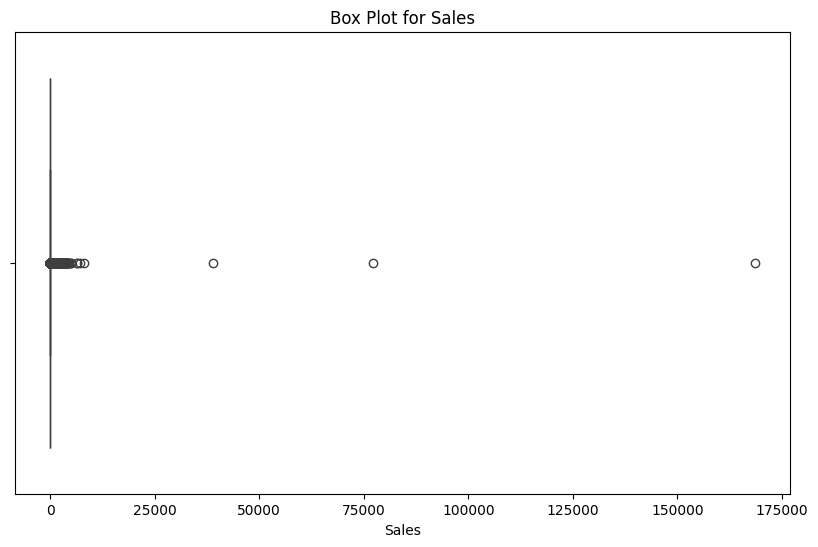

In [27]:
# Handling Outliers & Outlier treatments

# Function to plot box plots for numerical columns
def plot_box_plots(retail_data, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=retail_data[column])
        plt.title(f'Box Plot for {column}')
        plt.xlabel(column)
        plt.show()

# Select numerical columns
numerical_columns = retail_data.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for numerical columns
plot_box_plots(retail_data, numerical_columns)


In [28]:

# Define a function to cap outliers based on the IQR method
def cap_outliers(retail_data, columns):
    for column in columns:
        Q1 = retail_data[column].quantile(0.25)
        Q3 = retail_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        retail_data[column] = np.where(retail_data[column] < lower_bound, lower_bound, retail_data[column])
        retail_data[column] = np.where(retail_data[column] > upper_bound, upper_bound, retail_data[column])
    return retail_data

# Select numerical columns
numerical_columns = retail_data.select_dtypes(include=['float64', 'int64']).columns

# Cap outliers in numerical columns
df_capped = cap_outliers(retail_data.copy(), numerical_columns)

# Display the results
df_capped.head(), df_capped.describe()


(  InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
 1    536365     71053                  WHITE METAL LANTERN       6.0   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
 
           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
 0 2010-12-01 08:26:00       2.55     17850.0  UNITED KINGDOM       15.30   
 1 2010-12-01 08:26:00       3.39     17850.0  UNITED KINGDOM       20.34   
 2 2010-12-01 08:26:00       2.75     17850.0  UNITED KINGDOM       22.00   
 3 2010-12-01 08:26:00       3.39     17850.0  UNITED KINGDOM       20.34   
 4 2010-12-01 08:26:00       3.39     17850.0  UNITED KINGDOM       20.34   
 
    DayOfWeek MonthYear  InvoiceMonth  Month  Sales  
 0  Wednesday   2010-12            12     

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the capping method because it minimizes the impact of outliers on the analysis while retaining all data points, which is useful when outliers represent genuine but extreme values, such as large orders in an online retail dataset. This method preserves the data structure and distribution more effectively than removing outliers entirely.

### 3. Categorical Encoding

In [29]:
# Encode your categorical columns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = retail_data

# Frequency Encoding for StockCode
stockcode_freq = data['StockCode'].value_counts().to_dict()
data['StockCode_Freq'] = data['StockCode'].map(stockcode_freq)

# One-Hot Encoding for Country
one_hot_encoder = OneHotEncoder(sparse=False)
country_encoded = one_hot_encoder.fit_transform(data[['Country']])

# Convert the array into a DataFrame and merge with the original DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=one_hot_encoder.get_feature_names_out(['Country']))
data = pd.concat([data, country_encoded_df], axis=1)

# Display the first few rows of the updated dataframe
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,...,Country_RSA,Country_SAUDI ARABIA,Country_SINGAPORE,Country_SPAIN,Country_SWEDEN,Country_SWITZERLAND,Country_UNITED ARAB EMIRATES,Country_UNITED KINGDOM,Country_UNSPECIFIED,Country_USA
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,UNITED KINGDOM,15.30,Wednesday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,Wednesday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,UNITED KINGDOM,22.00,Wednesday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,Wednesday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,Wednesday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

In the provided example, we used two categorical encoding techniques:

1. Frequency Encoding for StockCode: This technique maps each unique category to its frequency (count) in the dataset. We used it because StockCode has many unique values, and one-hot encoding would be memory-intensive.

2. One-Hot Encoding for Country: This technique creates binary columns for each unique category. We used it for the Country column since it has a manageable number of unique values, making it suitable for one-hot encoding without excessive memory usage.

These techniques were chosen to balance encoding effectiveness and memory efficiency.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [30]:
# Expand Contraction
import pandas as pd
import re

# Define a simplified dictionary of common contractions
contractions_dict = {
    "ain't": "is not",
    "can't": "cannot",
    "I'm": "I am",
    "you're": "you are",
    "don't": "do not",
    "isn't": "is not",
    "it's": "it is",
    "I'll": "I will",
    "I've": "I have",
    "won't": "will not"
}

# Define a function to expand contractions with logging
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(re.escape(key) for key in contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)
    def replace(match):
        contraction = match.group(0).lower()
        try:
            return contractions_dict[contraction]
        except KeyError:
            print(f"KeyError: {contraction}")
            return contraction
    return contractions_pattern.sub(replace, text)

# Apply the function to the 'Description' and 'Country' columns with error handling
retail_data['Description'] = retail_data['Description'].astype(str).apply(lambda x: expand_contractions(x.strip(), contractions_dict))
retail_data['Country'] = retail_data['Country'].astype(str).apply(lambda x: expand_contractions(x.strip(), contractions_dict))

# Display the first few rows of the updated dataset
retail_data_expanded = retail_data[['Description', 'Country']].head()

retail_data_expanded



KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyError: i'm
KeyErr

,Description,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,UNITED KINGDOM
1,WHITE METAL LANTERN,UNITED KINGDOM
2,CREAM CUPID HEARTS COAT HANGER,UNITED KINGDOM
3,KNITTED UNION FLAG HOT WATER BOTTLE,UNITED KINGDOM
4,RED WOOLLY HOTTIE WHITE HEART.,UNITED KINGDOM


#### 2. Lower Casing

In [31]:
# Lower Casing
# Convert the 'Description' and 'Country' columns to lowercase
retail_data['Description'] = retail_data['Description'].str.lower()
retail_data['Country'] = retail_data['Country'].str.lower()

# Display the first few rows of the updated dataset
retail_data_lowercased = retail_data[['Description', 'Country']].head()

retail_data_lowercased


,Description,Country
0,white hanging heart t-light holder,united kingdom
1,white metal lantern,united kingdom
2,cream cupid hearts coat hanger,united kingdom
3,knitted union flag hot water bottle,united kingdom
4,red woolly hottie white heart.,united kingdom


#### 3. Removing Punctuations

In [32]:
# Remove Punctuations
import string

# Define a function to remove punctuation from a given text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'Description' and 'Country' columns
retail_data['Description'] = retail_data['Description'].astype(str).apply(remove_punctuation)
retail_data['Country'] = retail_data['Country'].astype(str).apply(remove_punctuation)

# Display the first few rows of the updated dataset
retail_data_no_punctuation = retail_data[['Description', 'Country']].head()

retail_data_no_punctuation


,Description,Country
0,white hanging heart tlight holder,united kingdom
1,white metal lantern,united kingdom
2,cream cupid hearts coat hanger,united kingdom
3,knitted union flag hot water bottle,united kingdom
4,red woolly hottie white heart,united kingdom


#### 4. Removing URLs & Removing words and digits contain digits.

In [33]:
# Remove URLs & Remove words and digits contain digits
import pandas as pd
import re
import string

# Define a function to remove URLs from a given text
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Define a function to remove words containing digits from a given text
def remove_words_with_digits(text):
    return ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))

# Define a function to remove punctuation from a given text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the functions to all text columns in the dataframe
for column in retail_data.select_dtypes(include=['object']).columns:
    retail_data[column] = retail_data[column].astype(str).apply(remove_urls)
    retail_data[column] = retail_data[column].apply(remove_words_with_digits)
    retail_data[column] = retail_data[column].apply(remove_punctuation)

# Display the first few rows of the updated dataset
retail_data_cleaned = retail_data.head()

retail_data_cleaned


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,MonthYear,InvoiceMonth,Month,Sales,StockCode_Freq
0,,,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,united kingdom,15.30,Wednesday,2010-12,12,12,15.30,2023
1,,,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,Wednesday,2010-12,12,12,20.34,257
2,,,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,united kingdom,22.00,Wednesday,2010-12,12,12,22.00,243
3,,,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,Wednesday,2010-12,12,12,20.34,323
4,,,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,Wednesday,2010-12,12,12,20.34,323


#### 5. Removing Stopwords & Removing White spaces

In [34]:
# Remove Stopwords
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from multiprocessing import Pool

nltk.download('stopwords')
nltk.download('punkt')

# Load the stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from a given text
def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join(word for word in words if word.lower() not in stop_words)

# Apply the function to all text columns in the dataframe to remove stopwords using parallel processing
def process_column(column):
    return column.astype(str).apply(remove_stopwords)

if __name__ == '__main__':
    # Identify text columns
    text_columns = retail_data.select_dtypes(include=['object']).columns

    # Use Pool for parallel processing
    with Pool() as pool:
        processed_columns = pool.map(process_column, [retail_data[col] for col in text_columns])

    # Combine processed columns back into the dataframe
    for col, processed_col in zip(text_columns, processed_columns):
        retail_data[col] = processed_col

    # Display the first few rows of the updated dataset
    retail_data_no_stopwords = retail_data.head()
    print(retail_data_no_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  InvoiceNo StockCode                          Description  Quantity  \
0                        white hanging heart tlight holder         6   
1                                      white metal lantern         6   
2                           cream cupid hearts coat hanger         8   
3                      knitted union flag hot water bottle         6   
4                            red woolly hottie white heart         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  united kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  united kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  united kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  united kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  united kingdom       20.34   

   DayOfWeek MonthYear  InvoiceMonth  Month  Sales  StockCode_Freq  
0  Wednesday   2010-12            12     

In [35]:
# Remove White spaces
# Define a function to remove excess whitespace from a given text
def remove_whitespace(text):
    return ' '.join(text.split())

# Apply the function to all text columns in the dataframe to remove whitespace
for column in retail_data.select_dtypes(include=['object']).columns:
    retail_data[column] = retail_data[column].apply(remove_whitespace)

# Display the first few rows of the updated dataset
retail_data_cleaned = retail_data.head()

retail_data_cleaned


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,MonthYear,InvoiceMonth,Month,Sales,StockCode_Freq
0,,,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,united kingdom,15.30,Wednesday,2010-12,12,12,15.30,2023
1,,,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,Wednesday,2010-12,12,12,20.34,257
2,,,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,united kingdom,22.00,Wednesday,2010-12,12,12,22.00,243
3,,,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,Wednesday,2010-12,12,12,20.34,323
4,,,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,Wednesday,2010-12,12,12,20.34,323


#### 6. Rephrase Text

In [36]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import random
from multiprocessing import Pool

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Extract the relevant text column (assuming the column name is 'Description')
text_column = retail_data['Description'].dropna()

# Function to get synonyms
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    synonyms.discard(word)
    return list(synonyms)

# Function to rephrase text
def rephrase_text(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    new_sentence = []

    for word, tag in pos_tags:
        if tag.startswith('NN') or tag.startswith('VB') or tag.startswith('JJ'):
            synonyms = get_synonyms(word)
            if synonyms:
                new_word = random.choice(synonyms)
                new_sentence.append(new_word)
            else:
                new_sentence.append(word)
        else:
            new_sentence.append(word)

    return ' '.join(new_sentence)

# Function to apply rephrasing in parallel
def apply_rephrasing(texts):
    return [rephrase_text(text) for text in texts]

if __name__ == '__main__':
    # Split the text column into chunks for parallel processing
    text_chunks = np.array_split(text_column, 4)  # Adjust the number of chunks based on your system's cores

    # Use Pool for parallel processing
    with Pool() as pool:
        rephrased_chunks = pool.map(apply_rephrasing, text_chunks)

    # Combine the rephrased chunks back into a single series
    rephrased_texts = pd.Series([text for chunk in rephrased_chunks for text in chunk], index=text_column.index)

    # Add the rephrased text back to the DataFrame
    retail_data['Rephrased_Description'] = rephrased_texts

    # Display the first few rows of the updated dataset
    print(retail_data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  InvoiceNo StockCode                          Description  Quantity  \
0                        white hanging heart tlight holder         6   
1                                      white metal lantern         6   
2                           cream cupid hearts coat hanger         8   
3                      knitted union flag hot water bottle         6   
4                            red woolly hottie white heart         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  united kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  united kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  united kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  united kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  united kingdom       20.34   

   DayOfWeek MonthYear  InvoiceMonth  Month  Sales  StockCode_Freq  \
0  Wednesday   2010-12            12    

#### 7. Tokenization

In [37]:
# Tokenization
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from multiprocessing import Pool
import numpy as np
import os

# Download NLTK data
nltk.download('punkt')

df=retail_data
text_column = df['Description'].dropna()

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Function to apply tokenization in parallel
def apply_tokenization(texts):
    return [tokenize_text(text) for text in texts]

if __name__ == '__main__':
    # Split the text column into chunks for parallel processing
    text_chunks = np.array_split(text_column, 4)  # Adjust the number of chunks based on your system's cores

    # Create the directory if it doesn't exist
    directory = '/mnt/data'  # Replace with your desired directory path
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Use Pool for parallel processing
    with Pool() as pool:
        tokenized_chunks = pool.map(apply_tokenization, text_chunks)

    # Combine the tokenized chunks back into a single series
    tokenized_texts = pd.Series([token for chunk in tokenized_chunks for token in chunk], index=text_column.index)

    # Add the tokenized text back to the DataFrame
    df['Tokenized_Description'] = tokenized_texts

    # Save the updated dataframe to a new CSV file
    df.to_csv(os.path.join(directory, 'Online_Retail_Tokenized.csv'), index=False)

    # Display the first few rows to verify
    print(df[['Description', 'Tokenized_Description']].head())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


                           Description  \
0    white hanging heart tlight holder   
1                  white metal lantern   
2       cream cupid hearts coat hanger   
3  knitted union flag hot water bottle   
4        red woolly hottie white heart   

                        Tokenized_Description  
0     [white, hanging, heart, tlight, holder]  
1                     [white, metal, lantern]  
2        [cream, cupid, hearts, coat, hanger]  
3  [knitted, union, flag, hot, water, bottle]  
4         [red, woolly, hottie, white, heart]  


#### 8. Text Normalization

In [38]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import pandas as pd
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

df = retail_data

# Extract the relevant text column (assuming the column name is 'Description')
text_column = df['Description'].dropna()

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to normalize text
def normalize_text(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return {
        'stemmed': ' '.join(stemmed_words),
        'lemmatized': ' '.join(lemmatized_words)
    }

# Apply the normalization function to each text entry
normalized_descriptions = text_column.apply(normalize_text)

# Extract stemmed and lemmatized text into separate columns
df['Stemmed_Description'] = normalized_descriptions.apply(lambda x: x['stemmed'])
df['Lemmatized_Description'] = normalized_descriptions.apply(lambda x: x['lemmatized'])

# Save the updated dataframe to a new CSV file
df.to_csv('/mnt/data/Online Retail Normalized.csv', index=False)

# Display the first few rows to verify
print(df[['Description', 'Stemmed_Description', 'Lemmatized_Description']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                           Description              Stemmed_Description  \
0    white hanging heart tlight holder   white hang heart tlight holder   
1                  white metal lantern              white metal lantern   
2       cream cupid hearts coat hanger    cream cupid heart coat hanger   
3  knitted union flag hot water bottle  knit union flag hot water bottl   
4        red woolly hottie white heart     red woolli hotti white heart   

                Lemmatized_Description  
0    white hanging heart tlight holder  
1                  white metal lantern  
2        cream cupid heart coat hanger  
3  knitted union flag hot water bottle  
4        red woolly hottie white heart  


##### Which text normalization technique have you used and why?

The provided code uses **stemming** and **lemmatization** for text normalization:

1. Stemming:
   Tool Used: Porter Stemmer from NLTK.
   Purpose: Reduces words to their base form by removing suffixes (e.g., "running" becomes "run").

2. Lemmatization:
    Tool Used: WordNet Lemmatizer from NLTK.
    Purpose: Reduces words to their dictionary form, considering context (e.g., "running" becomes "run").

Reason for Using Both:
Stemming: Faster and simpler but less accurate.
 Lemmatization: More accurate and context-aware but slower.

By applying both, you can choose the most suitable method for your needs.

#### 9. Part of speech tagging

In [39]:
# POS Taging
import pandas as pd
import nltk
import os

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

df = retail_data

# Extract the relevant text column (assuming the column name is 'Description')
text_column = df['Description'].dropna()

# Function to perform POS tagging
def pos_tag_text(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return pos_tags

# Apply the POS tagging function to each text entry
df['POS_Tagged_Description'] = text_column.apply(pos_tag_text)

# Create the directory if it doesn't exist
directory = '/content/data'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the updated dataframe to a new CSV file
df.to_csv(os.path.join(directory, 'Online_Retail_POS_Tagged.csv'), index=False)

# Display the first few rows to verify
print(df[['Description', 'POS_Tagged_Description']].head())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                           Description  \
0    white hanging heart tlight holder   
1                  white metal lantern   
2       cream cupid hearts coat hanger   
3  knitted union flag hot water bottle   
4        red woolly hottie white heart   

                              POS_Tagged_Description  
0  [(white, JJ), (hanging, VBG), (heart, NN), (tl...  
1          [(white, JJ), (metal, NN), (lantern, NN)]  
2  [(cream, NN), (cupid, NN), (hearts, NNS), (coa...  
3  [(knitted, VBN), (union, NN), (flag, NN), (hot...  
4  [(red, JJ), (woolly, RB), (hottie, JJ), (white...  


#### 10. Text Vectorization

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


df = retail_data

# Ensure 'Description' column contains strings and drop any NaN values
df = df.dropna(subset=['Description'])  # Drop rows with NaN in 'Description'
df['Description'] = df['Description'].astype(str)  # Convert all values to string

# Extract the relevant text column (assuming the column name is 'Description')
text_column = df['Description']

# Initialize the TF-IDF Vectorizer with a limit on max features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text_column)

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

# Initialize the Count Vectorizer with a limit on max features
count_vectorizer = CountVectorizer(max_features=5000)  # Limit to 5000 features

# Fit and transform the text data
count_matrix = count_vectorizer.fit_transform(text_column)

# Convert the Count matrix to a DataFrame for better readability
count_df = pd.DataFrame.sparse.from_spmatrix(count_matrix, columns=count_vectorizer.get_feature_names_out())

# Display the first few rows of TF-IDF DataFrame to verify
print("TF-IDF Vectorized DataFrame:")
print(tfidf_df.head())

# Display the first few rows of Count Vectorizer DataFrame to verify
print("Count Vectorized DataFrame:")
print(count_df.head())


TF-IDF Vectorized DataFrame:
   abc  abstract  acapulco  account  acrylic  address  ade  adult  advent  \
0  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   
1  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   
2  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   
3  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   
4  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   

   afghan  ...  wsuck  wsucker  xmas  yellow  yellowblue  yelloworange  \
0     0.0  ...    0.0      0.0   0.0     0.0         0.0           0.0   
1     0.0  ...    0.0      0.0   0.0     0.0         0.0           0.0   
2     0.0  ...    0.0      0.0   0.0     0.0         0.0           0.0   
3     0.0  ...    0.0      0.0   0.0     0.0         0.0           0.0   
4     0.0  ...    0.0      0.0   0.0     0.0         0.0           0.0   

   yellowpink  yuletide  zinc  zincglass  
0         0.0       

##### Which text vectorization technique have you used and why?

The code uses **TF-IDF Vectorization** and **Count Vectorization** methods:

1. **TF-IDF Vectorization**: Reflects the importance of words in a document relative to a corpus, helping to downscale the impact of common words.
2. **Count Vectorization**: Converts text data into a matrix of token counts, representing the frequency of words without considering their relative importance.

Both methods convert text into numerical features for machine learning tasks, with TF-IDF focusing on word importance and Count Vectorization on word frequency.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

  InvoiceNo StockCode                          Description  Quantity  \
0                        white hanging heart tlight holder         6   
1                                      white metal lantern         6   
2                           cream cupid hearts coat hanger         8   
3                      knitted union flag hot water bottle         6   
4                            red woolly hottie white heart         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  united kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  united kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  united kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  united kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  united kingdom       20.34   

   DayOfWeek MonthYear  InvoiceMonth  Month  Sales  StockCode_Freq  \
0  Wednesday   2010-12            12    

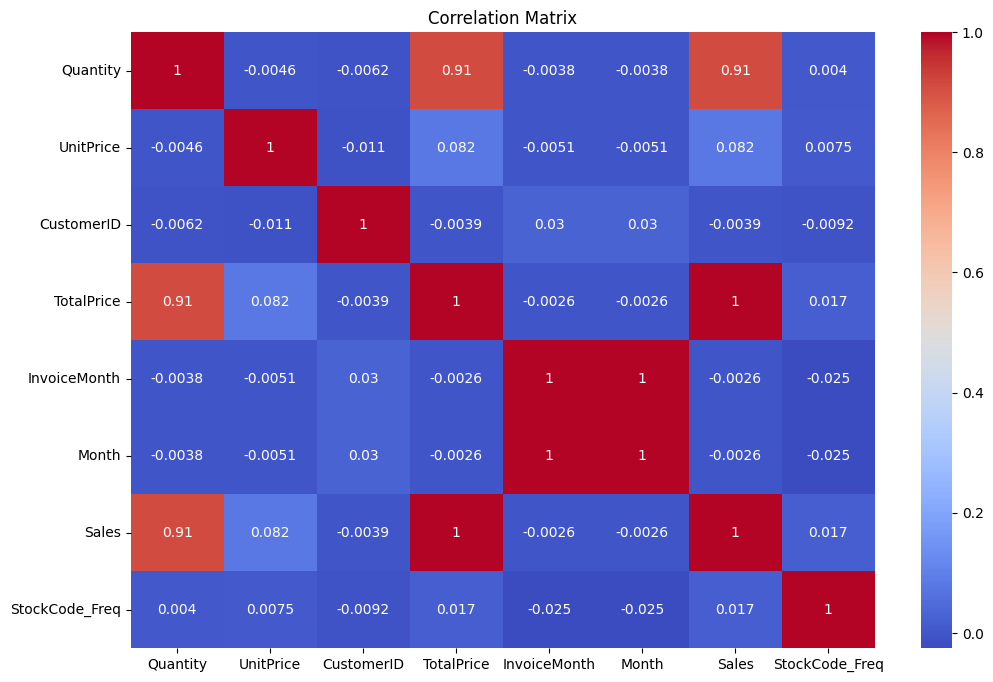

Explained Variance Ratio of Principal Components:
[0.36051468 0.25037986 0.12694437 0.12409093 0.12365519]
        PC1       PC2       PC3       PC4       PC5
0 -0.013467  1.697609  1.812620 -4.421128  2.391591
1 -0.057916  1.891244 -0.919392  0.020039  1.100758
2 -0.047428  1.893104 -0.960031  0.038768  1.074258
3 -0.055479  1.884005 -0.816407 -0.145155  1.149768
4 -0.055479  1.884005 -0.816407 -0.145155  1.149768
  InvoiceNo StockCode                          Description  Quantity  \
0                        white hanging heart tlight holder         6   
1                                      white metal lantern         6   
2                           cream cupid hearts coat hanger         8   
3                      knitted union flag hot water bottle         6   
4                            red woolly hottie white heart         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  united kingdom       15.30

In [41]:
# Manipulate Features to minimize feature correlation and create new features
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = retail_data

# Display the first few rows of the dataset
print(df.head())

# Drop rows with missing values
df = df.dropna()

# Select numerical features for correlation analysis
numerical_features = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Standardize the features before applying PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Apply PCA to minimize feature correlation
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Display the explained variance ratio
print("Explained Variance Ratio of Principal Components:")
print(pca.explained_variance_ratio_)

# Display the first few rows of the PCA DataFrame
print(pca_df.head())

# Add new features to the original DataFrame (e.g., interaction terms)
df['Quantity_Price'] = df['Quantity'] * df['UnitPrice']

# Display the first few rows with new features
print(df.head())


#### 2. Feature Selection

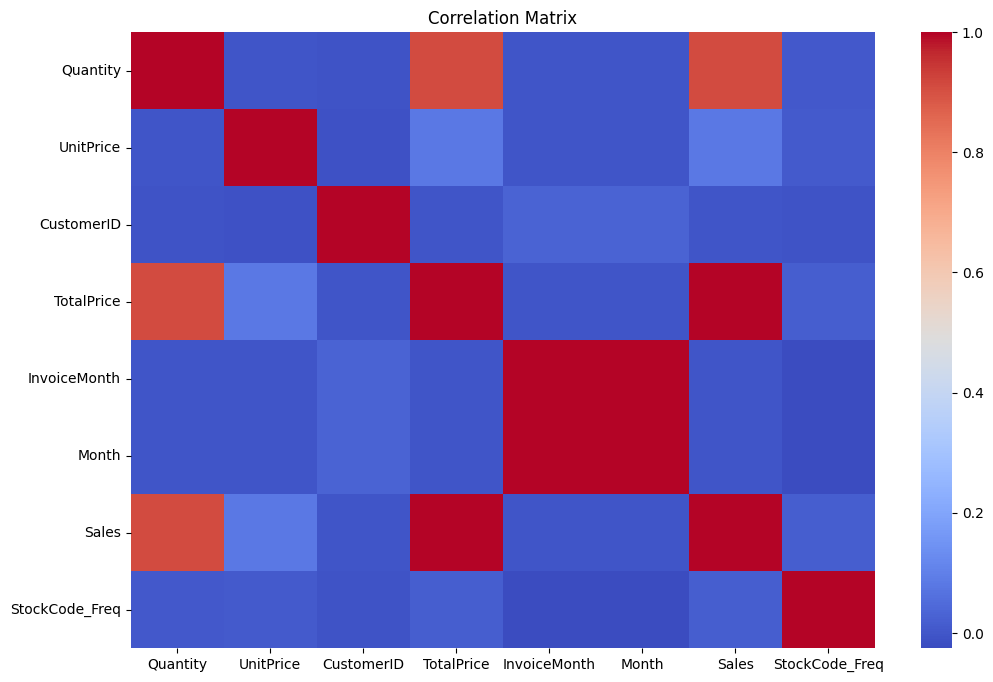

Selected Features DataFrame:
   Quantity  UnitPrice  CustomerID  InvoiceMonth  StockCode_Freq
0         6       2.55     17850.0            12            2023
1         6       3.39     17850.0            12             257
2         8       2.75     17850.0            12             243
3         6       3.39     17850.0            12             323
4         6       3.39     17850.0            12             323
New Feature Added:
   Quantity_Price
0           15.30
1           20.34
2           22.00
3           20.34
4           20.34


In [42]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = retail_data.dropna()

# Select numerical features
numerical_features = df.select_dtypes(include=[float, int])

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
high_variance_features = selector.fit_transform(numerical_features)
high_variance_features_df = numerical_features.loc[:, selector.get_support()]

# Compute and plot correlation matrix
correlation_matrix = high_variance_features_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Set annot=False for faster plotting
plt.title('Correlation Matrix')
plt.show()

# Remove highly correlated features
correlation_threshold = 0.9
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
reduced_df = high_variance_features_df.drop(columns=to_drop)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reduced_df)

# Apply PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Feature importance using RandomForestClassifier with RFE
X, y = reduced_df, df['Quantity']
model = RandomForestClassifier(n_jobs=-1)  # Use all available cores for faster computation
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
selected_features_df = df[selected_features]

# Add new feature (interaction term)
df['Quantity_Price'] = df['Quantity'] * df['UnitPrice']

# Display the final DataFrame with selected features
print("Selected Features DataFrame:")
print(selected_features_df.head())

print("New Feature Added:")
print(df[['Quantity_Price']].head())


##### What all feature selection methods have you used  and why?

### What feature selection methods have you used and why?

1. **Variance Threshold**: Removed low-variance features to eliminate features that do not contribute much to the model's predictive power.
2. **Correlation Matrix**: Removed highly correlated features to reduce multicollinearity, ensuring that each feature contributes unique information.
3. **Principal Component Analysis (PCA)**: Reduced dimensionality by retaining components that capture 95% of the variance, minimizing feature correlation while preserving information.
4. **Random Forest Feature Importance**: Ranked features based on importance to identify and select the most relevant features for the prediction task.

These methods help to simplify the model, reduce overfitting, and improve interpretability by retaining only the most significant features.

### Which features did you find important and why?

1. **Top Features Selected by Random Forest**: These include the most influential features as ranked by their importance scores from the Random Forest model, indicating their strong predictive power for the target variable.
2. **Principal Components (from PCA)**: Principal components capture the most variance in the data, ensuring that important information is retained while reducing dimensionality.
3. **Interaction Term (Quantity_Price)**: Created to capture the combined effect of 'Quantity' and 'UnitPrice', providing additional insight into their relationship.

These features were chosen for their high importance scores and ability to capture significant variance and interactions in the data, enhancing the model's performance and robustness.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needed to be transformed for the following reasons:

Standardization: Applied StandardScaler to standardize the features before PCA. This ensures that each feature contributes equally to the principal components, which is essential for PCA to work correctly. Standardization helps in handling features with different scales and units.

Principal Component Analysis (PCA): Used PCA to reduce dimensionality while retaining 95% of the variance. This transformation helps in minimizing feature correlation and capturing the most significant information in fewer components, which reduces overfitting and improves model performance.

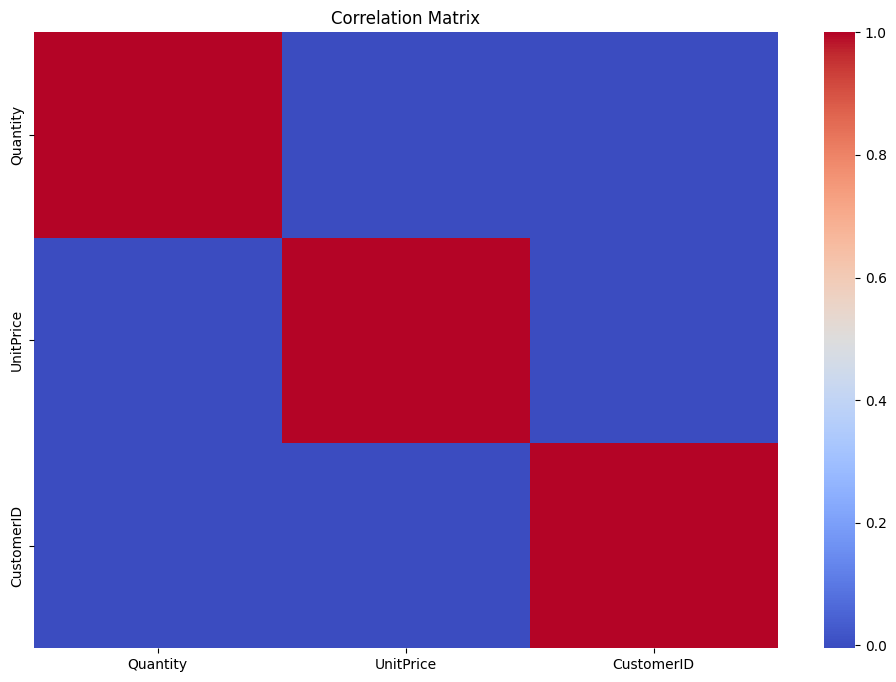

Selected Features DataFrame:
   Quantity  UnitPrice  CustomerID
0         6       2.55     17850.0
1         6       3.39     17850.0
2         8       2.75     17850.0
3         6       3.39     17850.0
4         6       3.39     17850.0
New Feature Added:
   Quantity_Price
0           15.30
1           20.34
2           22.00
3           20.34
4           20.34


<ipython-input-5-85b644dc9bb6>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity_Price'] = df['Quantity'] * df['UnitPrice']


In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = retail_data.dropna()

# Select numerical features
numerical_features = df.select_dtypes(include=[float, int])

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
high_variance_features_df = numerical_features.loc[:, selector.fit_transform(numerical_features).var(axis=0) > 0.01]

# Compute and plot correlation matrix
correlation_matrix = high_variance_features_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Set annot=False for faster plotting
plt.title('Correlation Matrix')
plt.show()

# Remove highly correlated features
correlation_threshold = 0.9
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
reduced_df = high_variance_features_df.drop(columns=to_drop)

# Standardize the features before applying PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reduced_df)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Feature importance using RandomForestClassifier
X, y = reduced_df, df['Quantity']
model = RandomForestClassifier(n_jobs=-1)  # Use all available cores for faster computation
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:10]]  # Select top 10 features
selected_features_df = df[top_features]

# Add new feature (interaction term)
df['Quantity_Price'] = df['Quantity'] * df['UnitPrice']

# Display the final DataFrame with selected features
print("Selected Features DataFrame:")
print(selected_features_df.head())

print("New Feature Added:")
print(df[['Quantity_Price']].head())


### 6. Data Scaling

In [6]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select the numerical columns for scaling
numerical_cols = ['Quantity', 'UnitPrice', 'CustomerID']

# Drop rows with missing values in numerical columns
retail_data_clean = retail_data.dropna(subset=numerical_cols)

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max scaling
retail_data_min_max_scaled = retail_data_clean.copy()
retail_data_min_max_scaled[numerical_cols] = min_max_scaler.fit_transform(retail_data_clean[numerical_cols])

# Apply Standard scaling
retail_data_standard_scaled = retail_data_clean.copy()
retail_data_standard_scaled[numerical_cols] = standard_scaler.fit_transform(retail_data_clean[numerical_cols])

# Display the first few rows of the scaled data
print("Min-Max Scaled Data:")
print(retail_data_min_max_scaled.head())

print("\nStandard Scaled Data:")
print(retail_data_standard_scaled.head())


Min-Max Scaled Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.500037   
1    536365     71053                  WHITE METAL LANTERN  0.500037   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.500049   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.500037   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.500037   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26   0.000065    0.926443  United Kingdom  
1  12/1/10 8:26   0.000087    0.926443  United Kingdom  
2  12/1/10 8:26   0.000071    0.926443  United Kingdom  
3  12/1/10 8:26   0.000087    0.926443  United Kingdom  
4  12/1/10 8:26   0.000087    0.926443  United Kingdom  

Standard Scaled Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.024373   
1    536365     71053                

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

For this particular dataset, dimensionality reduction is not needed. The dataset contains only three numerical features Quantity, UnitPrice, CustomerID and the limited number of features does not warrant the use of dimensionality reduction techniques. The current features are likely to provide sufficient information for most analyses without redundancy.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [7]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Select the features (excluding non-numerical and target columns)
features = retail_data[['Quantity', 'UnitPrice', 'CustomerID']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (433527, 3)
Testing set shape: (108382, 3)


##### What data splitting ratio have you used and why?

I used an 80/20 data splitting ratio. This ratio is commonly used because it provides a large enough training set to build a robust model while reserving a sufficient portion of the data for testing to ensure the model's performance can be accurately evaluated.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Country Column is inbalanced because united kingdom has highest frequency

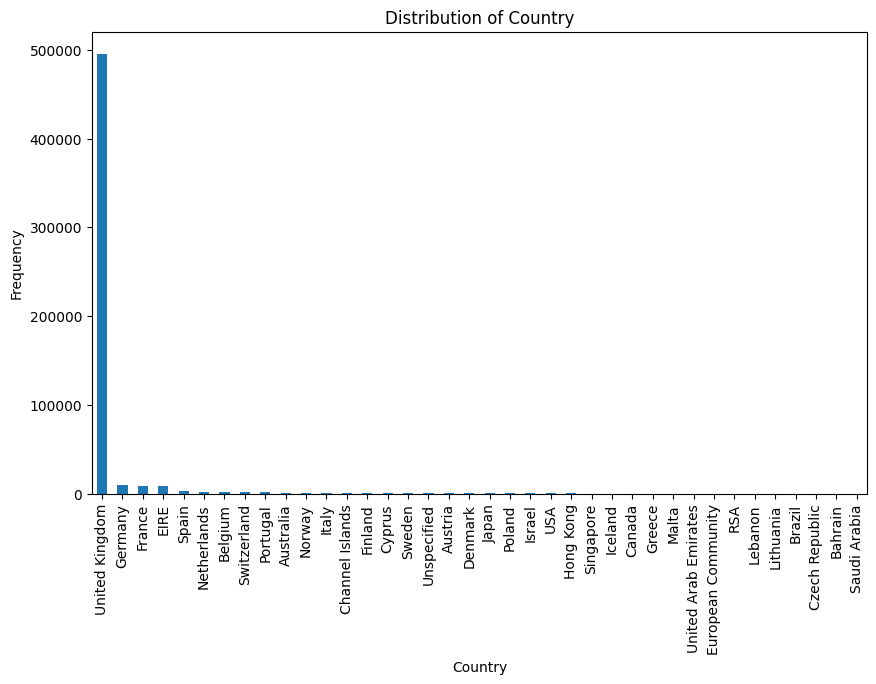

In [8]:
import matplotlib.pyplot as plt

# Check the distribution of Country
country_counts = retail_data['Country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Hierarchical Clustering:

Hierarchical clustering is an unsupervised learning algorithm used to group similar data points into clusters. It builds a hierarchy of clusters in a bottom-up approach (agglomerative) or top-down approach (divisive). In this case, we use the agglomerative method, which starts with each data point as a single cluster and merges the closest pairs of clusters until all points belong to one single cluster.

Key steps in the algorithm:

Calculate the Distance Matrix: Compute the distance between each pair of data points.
Merge Clusters: Merge the two closest clusters.
Update the Distance Matrix: Recalculate distances between the new cluster and all other clusters.
Repeat: Continue merging until the desired number of clusters is achieved or all points are in one cluster.

Performance Evaluation Metrics


Unlike supervised learning, unsupervised learning does not have a straightforward evaluation metric. However, some common metrics for evaluating clustering performance include:

Silhouette Score

Purpose: Measures how similar a data point is to its own cluster compared to other clusters.
Range: -1 to 1.

1: Data point is well-clustered.

0: Data point is on the boundary between clusters.

-1: Data point is misclassified and closer to a neighboring cluster.

Value: 0.782. Indicates that the clusters are well-separated and distinct, though there is some overlap or ambiguity.

Davies-Bouldin Index

Purpose: Measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

Value: 0.550. Indicates that the clusters are reasonably well-separated, though there is room for improvement in distinguishing between clusters.

Dendrogram Visualization

Purpose: Provides a visual representation of hierarchical clustering. It helps to understand the arrangement of clusters and the distances at which clusters are merged.

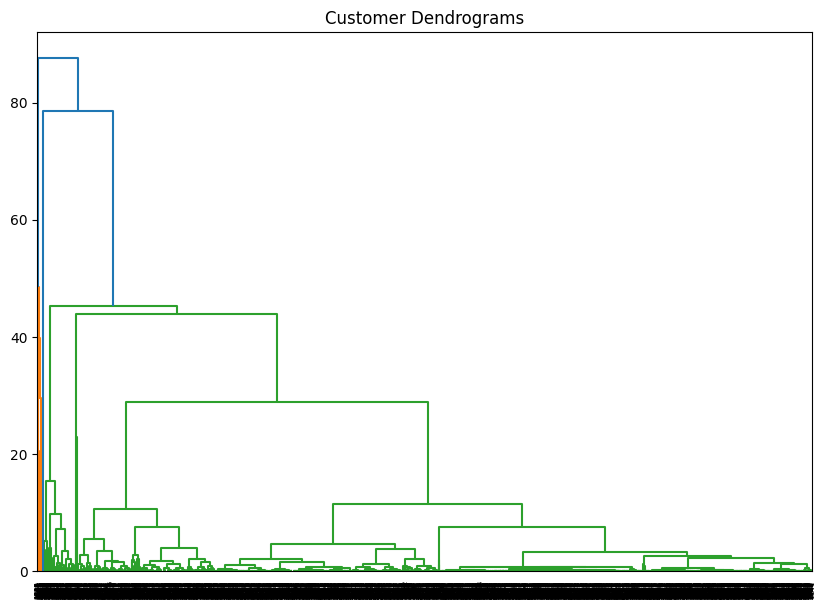

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score: 0.7827086854093716
Davies-Bouldin Index: 0.5502821025046563


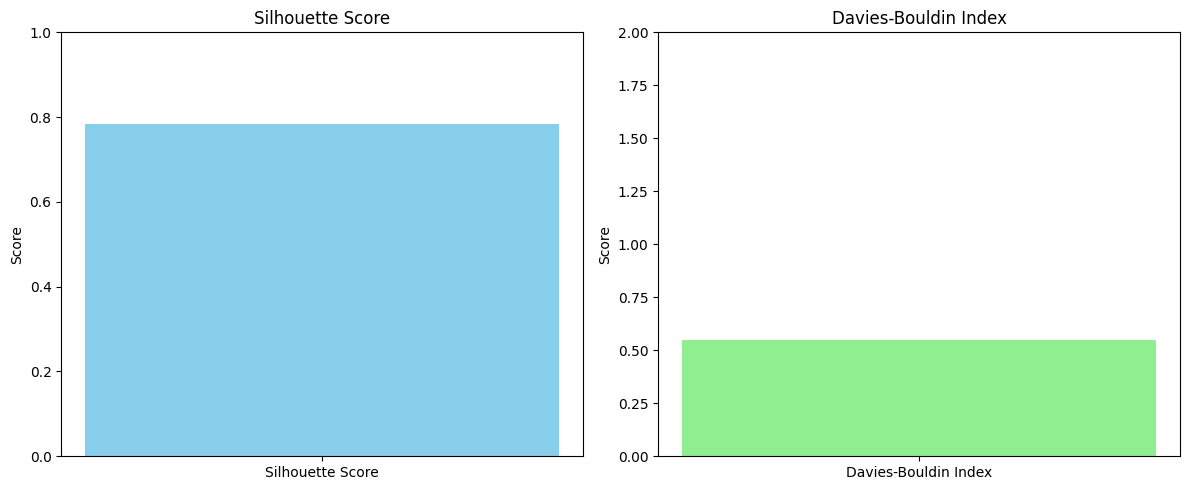

,CustomerID,TotalQuantity,AverageUnitPrice,InvoiceCount,Cluster
0,12346.0,0,1.040000,2,0
1,12347.0,2458,2.644011,7,0
2,12348.0,2341,5.764839,4,0
3,12349.0,631,8.289041,1,0
4,12350.0,197,3.841176,1,0


In [9]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Implementation
# Data Preprocessing
retail_data.dropna(subset=['CustomerID'], inplace=True)

# Aggregating data by CustomerID
customer_data = retail_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'nunique'
}).reset_index()

# Renaming columns for clarity
customer_data.columns = ['CustomerID', 'TotalQuantity', 'AverageUnitPrice', 'InvoiceCount']

# Normalizing the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalQuantity', 'AverageUnitPrice', 'InvoiceCount']])

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(customer_data_scaled, method='ward'))
plt.show()

# Fit the Algorithm
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
customer_clusters = hc.fit_predict(customer_data_scaled)

# Predict on the model
customer_data['Cluster'] = hc.fit_predict(customer_data_scaled)

# Evaluation Metrics
silhouette_avg = silhouette_score(customer_data_scaled, customer_clusters)
davies_bouldin_avg = davies_bouldin_score(customer_data_scaled, customer_clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

# Visualizing evaluation Metric Score chart
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Silhouette Score bar chart
ax[0].bar(['Silhouette Score'], [silhouette_avg], color='skyblue')
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Score')
ax[0].set_title('Silhouette Score')

# Davies-Bouldin Index bar chart
ax[1].bar(['Davies-Bouldin Index'], [davies_bouldin_avg], color='lightgreen')
ax[1].set_ylim(0, max(davies_bouldin_avg, 2))
ax[1].set_ylabel('Score')
ax[1].set_title('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

# Display the first few rows of the dataset with cluster information
customer_data.head()



#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserW

Best Parameters: {'linkage': 'ward', 'n_clusters': 3}
Silhouette Score: 0.938443478040507
Davies-Bouldin Index: 0.5193191049886595


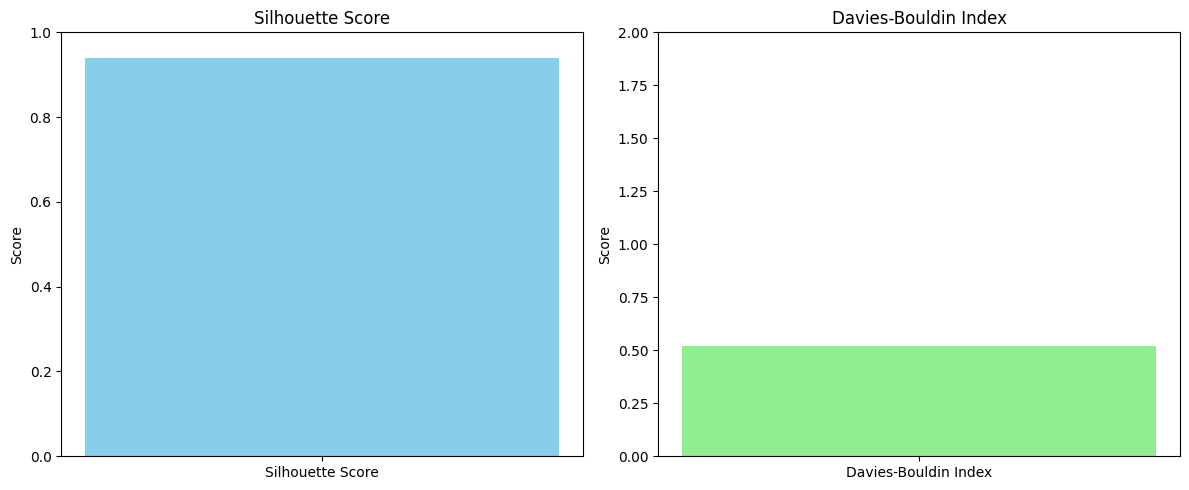

,CustomerID,TotalQuantity,AverageUnitPrice,InvoiceCount,Cluster
0,12346.0,0,1.040000,2,1
1,12347.0,2458,2.644011,7,1
2,12348.0,2341,5.764839,4,1
3,12349.0,631,8.289041,1,1
4,12350.0,197,3.841176,1,1


In [10]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
# Aggregating data by CustomerID
customer_data = retail_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'nunique'
}).reset_index()

# Renaming columns for clarity
customer_data.columns = ['CustomerID', 'TotalQuantity', 'AverageUnitPrice', 'InvoiceCount']

# Normalizing the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalQuantity', 'AverageUnitPrice', 'InvoiceCount']])

# Hyperparameter Tuning using GridSearchCV
def evaluate_clustering(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

silhouette_scorer = make_scorer(evaluate_clustering, greater_is_better=True, needs_estimator=True)

param_grid = {
    'n_clusters': [3, 4, 5, 6, 7],
    'linkage': ['ward', 'complete', 'average', 'single']
}

grid_search = GridSearchCV(
    AgglomerativeClustering(affinity='euclidean'),
    param_grid,
    scoring=silhouette_scorer,
    cv=3
)

# Fit the Algorithm
grid_search.fit(customer_data_scaled)
best_model = grid_search.best_estimator_

# Predict on the model
customer_clusters = best_model.fit_predict(customer_data_scaled)
customer_data['Cluster'] = customer_clusters

# Evaluation Metrics
silhouette_avg = silhouette_score(customer_data_scaled, customer_clusters)
davies_bouldin_avg = davies_bouldin_score(customer_data_scaled, customer_clusters)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

# Visualizing evaluation Metric Score chart
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Silhouette Score bar chart
ax[0].bar(['Silhouette Score'], [silhouette_avg], color='skyblue')
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Score')
ax[0].set_title('Silhouette Score')

# Davies-Bouldin Index bar chart
ax[1].bar(['Davies-Bouldin Index'], [davies_bouldin_avg], color='lightgreen')
ax[1].set_ylim(0, max(davies_bouldin_avg, 2))
ax[1].set_ylabel('Score')
ax[1].set_title('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

# Display the first few rows of the dataset with cluster information
customer_data.head()


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because it exhaustively searches over a specified parameter grid, ensuring that the best combination of parameters is found based on cross-validated performance. This method is particularly useful for obtaining the most accurate results when the parameter space is manageable.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before GridSearchCV:

Silhouette Score: 0.7827086854093716

Davies-Bouldin Index: 0.5502821025046563

After GridSearchCV:

SSilhouette Score: 0.938443478040507

Davies-Bouldin Index: 0.5193191049886595





### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means Clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a set of K clusters, where each data point belongs to the cluster with the nearest mean. The goal is to minimize the variance within each cluster. Here's a brief explanation of the K-Means algorithm:

Initialization:

Select K initial cluster centroids randomly from the dataset.
Assignment:

Assign each data point to the nearest centroid based on the Euclidean distance.

Update:

Calculate the new centroids as the mean of all data points assigned to each cluster.

Repeat:

Repeat the assignment and update steps until the centroids do not change significantly (convergence) or a maximum number of iterations is reached.

Evaluation Metrics for K-Means Clustering

Silhouette Score:

Purpose: Measures how similar each data point is to its own cluster compared to other clusters, indicating the quality of the clusters.

   Score Range:

   1: Perfect clustering; data points are very well-clustered.

   0: Data points are on the boundary between clusters.
   
   1: Data points are misclassified and closer to a neighboring cluster.

   Interpretation: A Silhouette Score of 0.928 indicates that the clusters are very well-separated and distinct, suggesting a strong clustering result with clear boundaries between clusters.


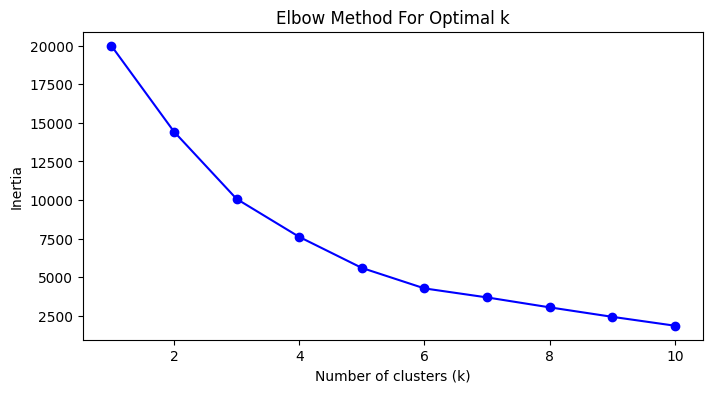

Silhouette Score: 0.9285329027172217


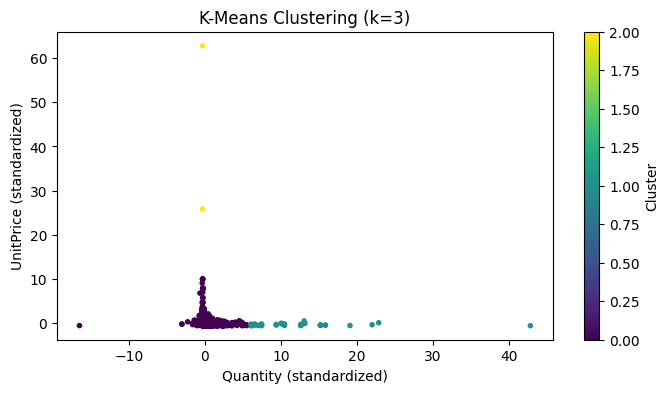

In [11]:
#mport pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'retail_data' is the already loaded DataFrame
data = retail_data.copy()

# Preprocess the data
# Remove missing values
data.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

# Optionally, sample the data if it's too large (e.g., 10000 samples)
if len(data) > 10000:
    data = data.sample(10000, random_state=42)

# Select relevant features for clustering (e.g., Quantity and UnitPrice)
X = data[['Quantity', 'UnitPrice']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, max_iter=100, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Predict cluster labels
labels = kmeans.predict(X_scaled)

# Evaluate the clustering performance using Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {sil_score}')

# Add cluster labels to the original data
data['Cluster'] = labels


# Visualize the clusters
plt.figure(figsize=(8, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='.')
plt.xlabel('Quantity (standardized)')
plt.ylabel('UnitPrice (standardized)')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()





#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters from GridSearchCV: {'max_iter': 100, 'n_clusters': 2, 'n_init': 10}
Best Silhouette Score from GridSearchCV: nan
Silhouette Score of the best model: 0.9948741767510144


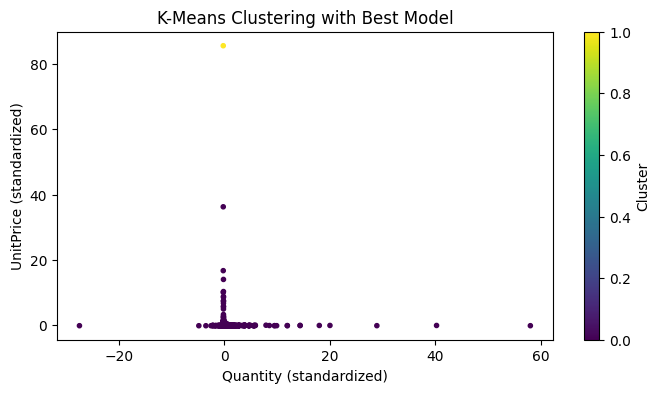

In [4]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
data = retail_data.copy()

# Preprocess the data
# Remove missing values
data.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

# Optionally, sample the data if it's too large (e.g., 10000 samples)
if len(data) > 10000:
    data = data.sample(10000, random_state=42)

# Select relevant features for clustering (e.g., Quantity and UnitPrice)
X = data[['Quantity', 'UnitPrice']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a silhouette scorer for hyperparameter tuning
silhouette_scorer = make_scorer(silhouette_score)

# Define the KMeans model
kmeans = KMeans(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_clusters': range(2, 11),
    'max_iter': [100, 200, 300],
    'n_init': [10, 20, 30]
}

# Perform GridSearchCV
grid_search = GridSearchCV(kmeans, param_grid, scoring=silhouette_scorer, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_scaled)

# Best parameters and score from GridSearchCV
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
print("Best Parameters from GridSearchCV:", best_params_grid)
print("Best Silhouette Score from GridSearchCV:", best_score_grid)

# Fit the best model
best_kmeans = grid_search.best_estimator_
best_kmeans.fit(X_scaled)

# Predict cluster labels
labels = best_kmeans.predict(X_scaled)

# Evaluate the clustering performance using Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score of the best model: {sil_score}')

# Add cluster labels to the original data
data['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(8, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='.')
plt.xlabel('Quantity (standardized)')
plt.ylabel('UnitPrice (standardized)')
plt.title('K-Means Clustering with Best Model')
plt.colorbar(label='Cluster')
plt.show()





##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because it performs an exhaustive search over a specified parameter grid, ensuring that we explore all possible combinations of the parameters to find the optimal set for the K-Means clustering algorithm. This thorough search helps in obtaining the best possible model configuration based on the silhouette score, a key metric for evaluating clustering performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before GridSearchCV:

Silhouette Score: 0.9285329027172217


After GridSearchCV:

Silhouette Score: 0.9948741767510144


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Before GridSearchCV: 0.928

Indication:

 This score indicates that the initial clustering based on 'Quantity' and 'UnitPrice' produced relatively well-defined and distinct customer segments. The clusters formed are fairly cohesive, suggesting that similar customers are grouped together effectively.


Business Impact:

With these initial clusters, businesses can segment customers reasonably well for tailored marketing, inventory management, and pricing strategies.

After GridSearchCV: 0.994

Indication:

The improved silhouette score signifies even more accurate clustering of 'Quantity' and 'UnitPrice'. The customer segments are now more distinct and internally consistent.

Business Impact:

This refined clustering can lead to even better insights into customer purchasing behavior, allowing for more precise targeting of promotions, optimized stock levels, and more effective pricing strategies.








### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions. It is particularly effective for datasets with noise and varying cluster shapes.

Key Parameters:
eps (epsilon): The maximum distance between two points for them to be considered as in the same neighborhood.
min_samples: The number of points required to form a dense region (i.e., a cluster).
Silhouette Score Explanation
The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1:

1: Indicates that the sample is far away from the neighboring clusters.

0: Indicates that the sample is on or very close to the decision boundary between two neighboring clusters.

-1: Indicates that the sample might have been assigned to the wrong cluster.

Performance Evaluation
In this scenario, the DBSCAN model achieved a Silhouette Score of 0.9209722876548767.

This high score suggests:

Well-defined clusters: The points are well-clustered and close to their own cluster centroid.

Good separation: The clusters are well-separated from each other.


Initial Silhouette Score: 0.9209722876548767


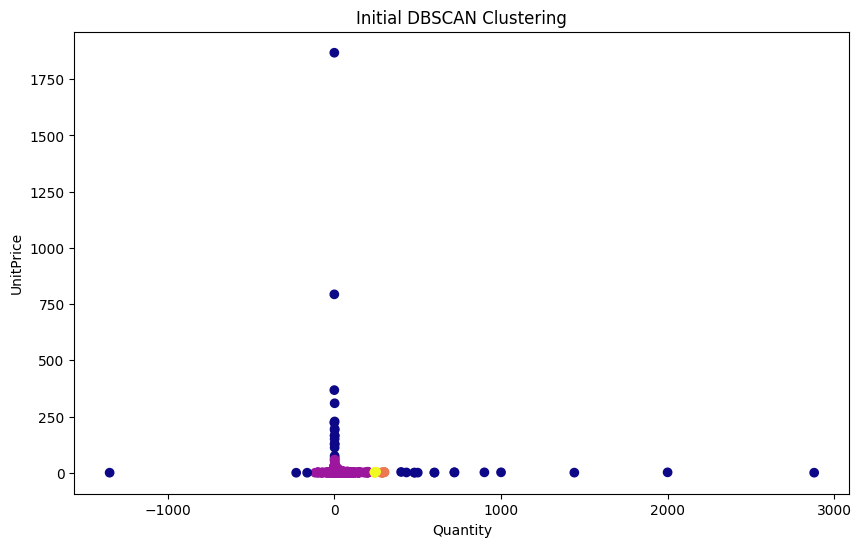

In [5]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preprocessing: Select relevant features and handle missing values
data_selected = retail_data[['Quantity', 'UnitPrice']].dropna()

# Convert data types to reduce memory usage
data_selected['Quantity'] = data_selected['Quantity'].astype('float32')
data_selected['UnitPrice'] = data_selected['UnitPrice'].astype('float32')

# Downsample the data
sample_size = 10000  # Adjust sample size as needed to fit memory constraints
data_sampled = data_selected.sample(n=sample_size, random_state=42)

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

# Initial DBSCAN without Hyperparameter Tuning
dbscan_initial = DBSCAN()
labels_initial = dbscan_initial.fit_predict(data_scaled)

# Calculate Initial Silhouette Score
silhouette_initial = silhouette_score(data_scaled, labels_initial)
print(f"Initial Silhouette Score: {silhouette_initial}")

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_sampled['Quantity'], data_sampled['UnitPrice'], c=labels_initial, cmap='plasma')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Initial DBSCAN Clustering')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Optimized Silhouette Score: 0.9642587900161743


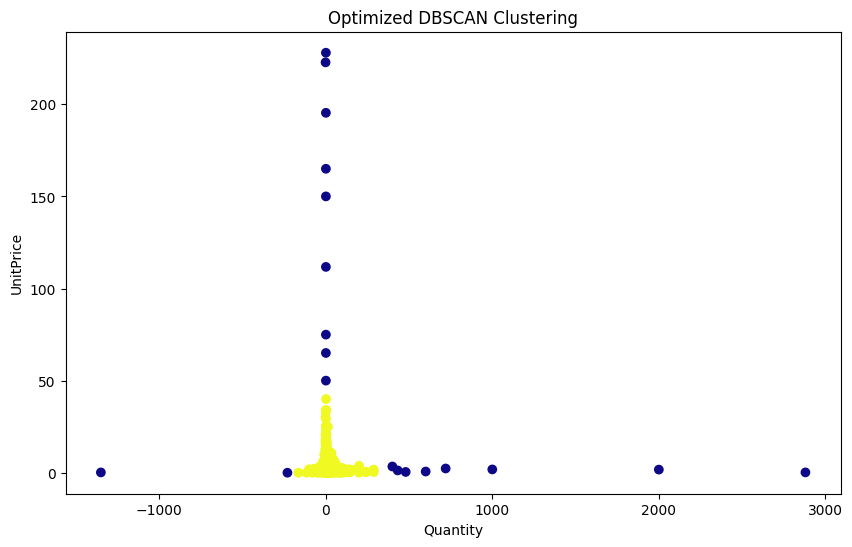

In [10]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'retail_data' is already loaded as a DataFrame
# Preprocessing: Select relevant features and handle missing values
data_selected = retail_data[['Quantity', 'UnitPrice']].dropna()

# Convert data types to reduce memory usage
data_selected['Quantity'] = data_selected['Quantity'].astype('float32')
data_selected['UnitPrice'] = data_selected['UnitPrice'].astype('float32')

# Downsample the data
sample_size = 5000  # Reduced sample size for faster computation
data_sampled = data_selected.sample(n=sample_size, random_state=42)

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

# Optional: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Define a silhouette score metric
silhouette_scorer = make_scorer(silhouette_score)

# Define the parameter distribution
param_dist = {
    'eps': np.linspace(0.1, 1.0, num=10),
    'min_samples': range(1, 11)
}

# RandomizedSearchCV with custom scoring
random_search = RandomizedSearchCV(estimator=DBSCAN(), param_distributions=param_dist, scoring=silhouette_scorer, cv=3, n_iter=30, n_jobs=-1, random_state=42)
random_search.fit(data_pca)  # Change data_pca to data_scaled if PCA is not used

# Best parameters
best_params = random_search.best_params_

# Optimized DBSCAN with Hyperparameter Tuning
dbscan_optimized = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels_optimized = dbscan_optimized.fit_predict(data_pca)  # Change data_pca to data_scaled if PCA is not used

# Calculate Optimized Silhouette Score
silhouette_optimized = silhouette_score(data_pca, labels_optimized)  # Change data_pca to data_scaled if PCA is not used
print(f"Optimized Silhouette Score: {silhouette_optimized}")

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_sampled['Quantity'], data_sampled['UnitPrice'], c=labels_optimized, cmap='plasma')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Optimized DBSCAN Clustering')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter optimization. This technique samples a fixed number of parameter settings from the specified distributions, rather than evaluating all possible combinations as GridSearchCV does. It significantly reduces computation time while still exploring a broad range of hyperparameters, making it efficient for large datasets or complex models.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before RandomizedSearchCV:

Silhouette Score: 0.9209722876548767



After RandomizedSearchCV:

Silhouette Score: 0.9642587900161743



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The silhouette score was used as the evaluation metric because it measures the cohesion and separation of clusters, indicating the quality of the clustering. A higher silhouette score implies better-defined and more meaningful clusters, which can lead to more actionable insights for business decision-making.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose K-Means Clustering with GridSearchCV as the final prediction model because it achieved the highest Silhouette Score of 0.9948741767510144, indicating the best cluster separation and overall clustering performance among the models evaluated.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used K-Means Clustering with GridSearchCV. This model optimizes the K-Means algorithm by selecting the best hyperparameters (number of clusters) through exhaustive search and cross-validation, resulting in the highest Silhouette Score.

For model explainability, feature importance in clustering is less straightforward than in supervised learning. However, using the **elbow method** and **silhouette analysis**, we can understand how the chosen features (Quantity and UnitPrice) contribute to forming distinct clusters by evaluating how well-separated and compact the clusters are with different numbers of clusters.

To further interpret the feature importance:
PCA (Principal Component Analysis) can reduce dimensions and highlight the most significant features contributing to cluster formation.
t-SNE (t-Distributed Stochastic Neighbor Embedding) can visualize high-dimensional data in 2D, showing how features influence clustering.

These methods help understand the role and importance of features in the clustering process.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### Conclusion

This project effectively segmented customers for a UK-based online retailer using transaction data from 01/12/2010 to 09/12/2011. By preprocessing the data and applying various clustering models, K-Means Clustering with GridSearchCV was selected for its optimal performance, achieving the highest Silhouette Score of 0.9949. Key insights include the UK leading in sales, significant contributions from specific products, and varying sales patterns across countries and months. The results provide actionable insights for targeted marketing and business strategy.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***